图像分割的背景知识

基本内容
一.深度学习框架简介
二.深度卷积神经网络的基本单元
三.图像分割网络UNet
四.图像分割的任务流程
五.分类任务示例

一.深度学习框架简介

为什么需要深度学习框架？
·易于构建大型计算模型
·自动进行梯度计算
·能够有效利用GPU加速计算

常用的深度学习框架有哪些？他们各自有什么特点？
·Tensorflow
Google开发的深度学习框架，可移植性强，支持分布式计算，支持多种计算机语言，例如Python、JavaScript、C++、Java、Go、Swift等；
采用静态图模型，计算速度较慢。
·Pytorch
Facebook开发的深度学习框架，采用动态图模型，提供很好的灵活性，适合研究，计算速度较快，更加适合循环或递归神经网络。
·Caffe2
Facebook开发的深度学习框架，核心程序采用C++编写，更加高效，适合工业界开发，支持在IOS、Android上进行开发。
·Deeplearning4j
基于Java开发，与Hadoop、Spark生态结合紧密，也提供Python接口。
·MXNet
Amazon开发的深度学习框架，支持动态图计算，有非常良好的中文支持文档。
·Keras
提供简单易用的API接口，其后端可以采用TensorFlow,CNTK以及Theano，适合初学者。
·Gluon
Amazon和Microsoft联合推出的深度学习API,类似于Keras，提供简单易用的API接口，支持动态计算图（特别适合自然语言处理），后端采用MXNet，未来支持CNTK

Pytorch中的数据形式
Scalar (0-D tensors)
Vector (1-D tensors)
Matrix (2-D tensors)
High Dimensional tensors
Tensors on GPU
Variables

In [1]:
import time
import torch
import numpy as np
# Scalar
scalar = torch.rand(10)
print(scalar.size())
# Vector
vector = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
print(vector.size())
# Matrix
matrix_data = np.random.rand(506,13)
matrix_tensor = torch.from_numpy(matrix_data)
print(matrix_tensor.size())
print(matrix_tensor[:2]) # shape = (2, 13)
# High Dimensional Tensors
tensor = torch.rand(224,224,3)
print(tensor.size())

torch.Size([10])
torch.Size([6])
torch.Size([506, 13])
tensor([[ 0.2617,  0.2683,  0.4688,  0.7257,  0.6029,  0.4812,  0.8289,
          0.7171,  0.3042,  0.8364,  0.9175,  0.8087,  0.0607],
        [ 0.1085,  0.9234,  0.1905,  0.1993,  0.6440,  0.8733,  0.0460,
          0.0079,  0.5409,  0.1437,  0.8535,  0.8310,  0.0474]], dtype=torch.float64)
torch.Size([224, 224, 3])


In [2]:
# Tensors Calculation
a = torch.rand(2,2)
b = torch.rand(2,2)
c = a + b
print('a', a)
print('b', b)
print('c = a + b', c)
d = torch.add(a,b)
print('d = a + b', d)
a.add_(5) # for in-place addition
print('a = a + 5', a)
print('a * b', a*b)
a.mul(b) # for in-place multiplication
print('a = a * b', a)
# Tensors on GPU
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)
start = time.time()
a.matmul(b)
end = time.time()
print("Time on CPU taken: %.3f" % (end-start))
start = time.time()
a = a.cuda()
b = b.cuda()
# start = time.time()
a.matmul(b)
end = time.time()
print("Time on GPU taken: %.3f" % (end-start))

a tensor([[ 0.9035,  0.5787],
        [ 0.1149,  0.1837]])
b tensor([[ 0.0637,  0.2070],
        [ 0.6365,  0.9299]])
c = a + b tensor([[ 0.9672,  0.7857],
        [ 0.7514,  1.1136]])
d = a + b tensor([[ 0.9672,  0.7857],
        [ 0.7514,  1.1136]])
a = a + 5 tensor([[ 5.9035,  5.5787],
        [ 5.1149,  5.1837]])
a * b tensor([[ 0.3761,  1.1547],
        [ 3.2554,  4.8204]])
a = a * b tensor([[ 5.9035,  5.5787],
        [ 5.1149,  5.1837]])
Time on CPU taken: 3.548
Time on GPU taken: 4.358


如下伪代码展示了如何利用Pytorch构建计算模型: y = wx + b

In [ ]:
x,y = get_data() # x - represents training data, y - represents target variables
w,b = get_weights() # w,b - learnable parameters
for i in range(500):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y,y_pred) # calculates sum of the squared differences of y and y_pred
    loss_backward() # back propagate gradient
    if i % 50 == 0:
        print(loss)
        optimize(learning_rate) # Adjust w,b to minimize the loss
        gradient_zeros() # remove accumulate gradients

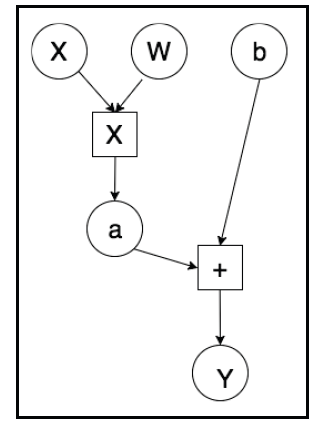

计算图中的每个节点代表一个变量(Variable)
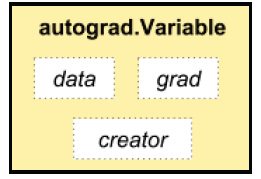

In [2]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean() # (x1+x2+x3+x4)/4
y.backward() # calculate the gradients
print(x.grad)
print(x.grad_fn)
print(x.data)
print(y.grad_fn)

tensor([[ 0.2500,  0.2500],
        [ 0.2500,  0.2500]])
None
tensor([[ 1.,  1.],
        [ 1.,  1.]])


构建模型的一般步骤：
1.准备数据
2.确定需要学习的参数
3.构建网络模型
4.确定损失函数
5.确定优化方法

In [ ]:
# 准备数据
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    
    return X,y
# Pytorch中有Dataset Class来定义准备数据的过程

In [ ]:
# 确定需要学习的参数
def get_weights():
    w = Variable(torch.randn(1),requires_grad=True)
    b = Variable(torch.randn(1),requires_grad=True)
    
    return w,b

In [ ]:
# 构建网络模型
def simple_network(x):
    y_pred = torch.matmul(x,w) + b
    
    return y_pred
# Pytorch中的nn module封装了各种常用的网络结构单元，上述功能对应: f = nn.Linear(17,1) # more simpler

In [ ]:
# 确定损失函数
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None:
            param.grad.data.zero_()
    loss.backward() # calculate the gradients of our learnable parameters, w and b
    
    return loss.data.item()

In [ ]:
# 确定优化方法
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data
# Pytorch中的optim module封装了各种常用的优化器

2.深度卷积神经网络的基本单元

卷积层(Convolutional Layer)

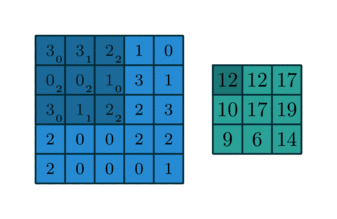
卷积核大小: 3x3

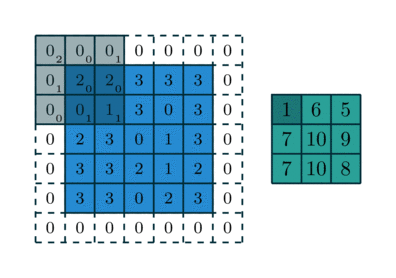
卷积核大小:3x3, Padding大小:1x1

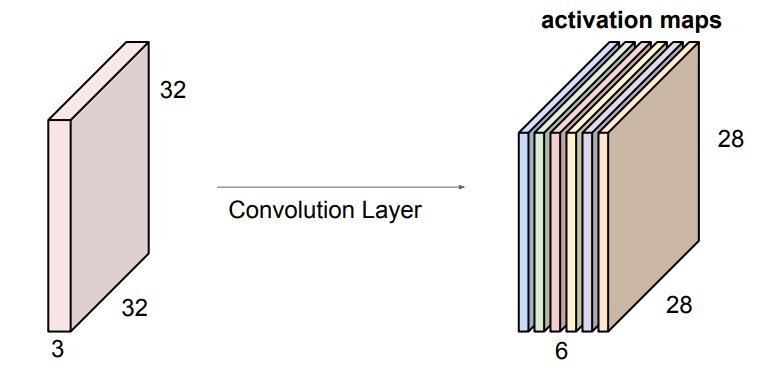
卷积核大小: 5x5

Class Definition
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
输入与输出变量的格式
(num_batch, num_channels, height, width)

In [3]:
import torch.nn as nn
#For example, if we had 6 5x5 filters, we’ll get 6 separate activation maps
conv1 = nn.Conv2d(3, 6, 5)
input_ = torch.randn(5, 3, 32, 32) #5 32x32 RGB images
output = conv1(input_)
print(output.size())

torch.Size([5, 6, 28, 28])


激活函数(Activation Function)

Sigmoid Unit
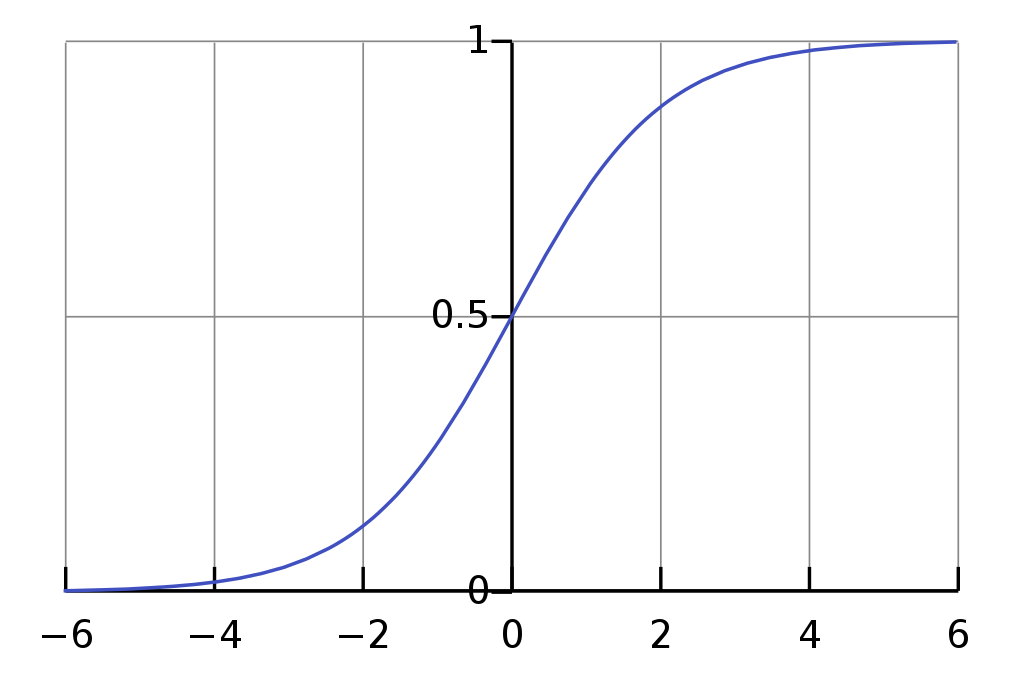

In [4]:
input_ = torch.randn(2)
sigmoid = nn.Sigmoid()
output = sigmoid(input_)
print(input_)
print(output)

tensor([ 0.1018,  1.9621])
tensor([ 0.5254,  0.8768])


Rectified Linear Unit
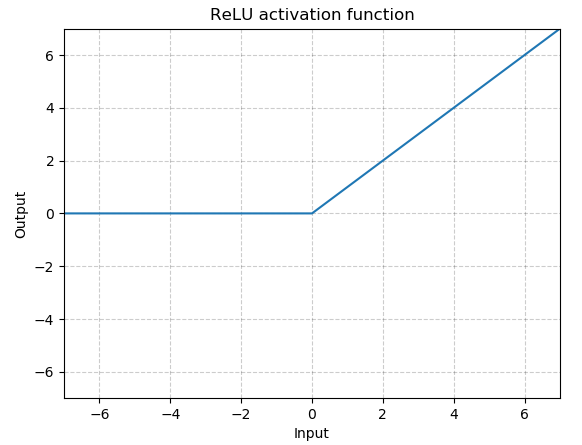

In [6]:
input_ = torch.randn(2)
ReLU = nn.ReLU()
output = ReLU(input_)
print(input_)
print(output)

tensor([-0.2738,  0.4348])
tensor([ 0.0000,  0.4348])


池化层(Pooling Layer)

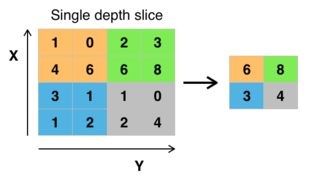
2x2最大池化，Stride=2

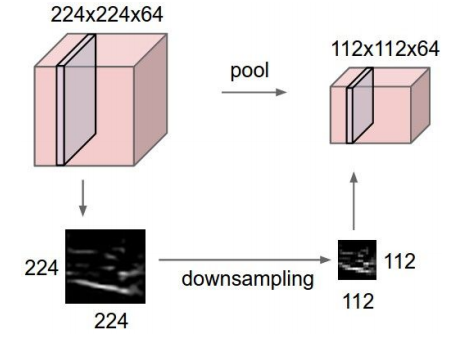

In [7]:
# pool of square window of size=3, stride=2
maxpool2d = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
input_ = torch.randn(5, 64, 224, 224)
output = maxpool2d(input_)
print(input_.size())
print(output.size())

torch.Size([5, 64, 224, 224])
torch.Size([5, 64, 112, 112])


上采样层(Upsampling)

In [8]:
input_ = torch.randn(5, 8, 16, 16)
upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
output = upsample(input_)
print(input_.size())
print(output.size())

torch.Size([5, 8, 16, 16])
torch.Size([5, 8, 32, 32])


反卷积层(Transpose Convolutional Layer)

# 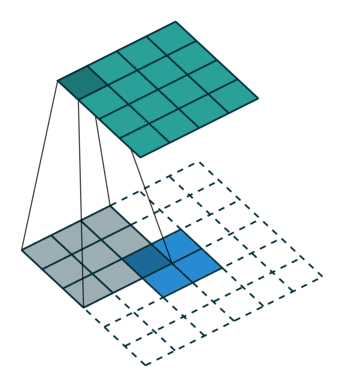
Padding = 0, Stride = 1

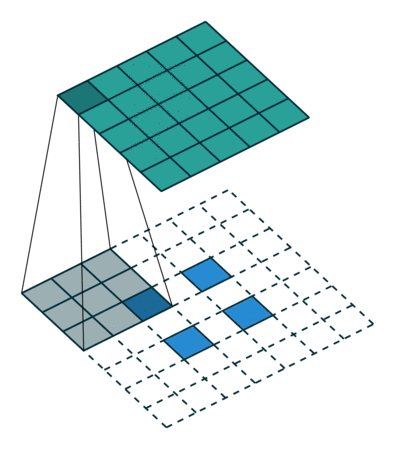
Padding = 0, Stride = 2

torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)

In [9]:
input_ = torch.randn(1, 16, 12, 12)
downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
v = downsample(input_)
print(input_.size())
print(v.size()) # floor((H_in + padding*2 - kernel_size) / stride) + 1 = 6

torch.Size([1, 16, 12, 12])
torch.Size([1, 16, 6, 6])


In [10]:
upsample = nn.ConvTranspose2d(16, 16, 2, stride=2)
output = upsample(v)
print(v.size())
print(output.size()) # (H_in - 1)*stride-2*padding+kernel_size = (6-1)*2-2*0+2 = 12

torch.Size([1, 16, 6, 6])
torch.Size([1, 16, 12, 12])


损失函数(Loss Function)

二类交叉熵损失函数
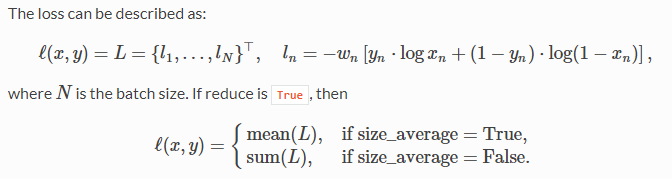

torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='elementwise_mean')
Input:( N, * ), Target: ( N, * ), Output: scalar

In [11]:
sigmoid = nn.Sigmoid()
prediction = sigmoid(torch.randn(3))
target = torch.tensor([1.0, 0.0, 1.0])
print(prediction)
print(target)
bce_loss = nn.BCELoss()
output = bce_loss(prediction, target)
print(output)

tensor([ 0.5913,  0.2067,  0.6803])
tensor([ 1.,  0.,  1.])
tensor(0.3807)


3.图像分割网络的结构

使用全卷积网络对各个像素点进行分类，分为前景和背景。当前主流的语义分割网络都是基于全卷积网络的结构，典型的有FCN,SegNet,UNet,PSPNet,DeepLab等。

FCN
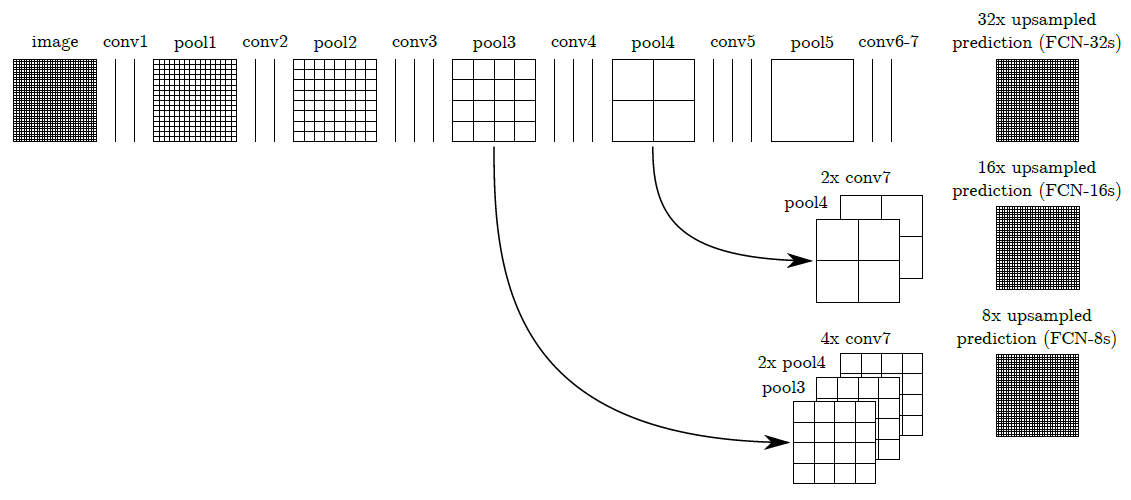

UNet
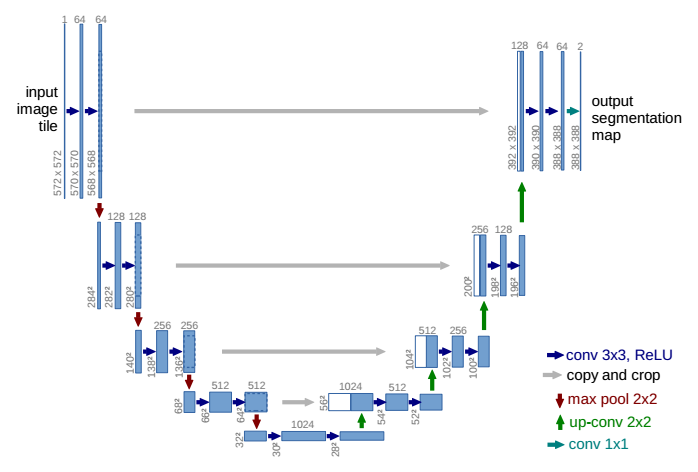

四.图像分割的任务流程

·定义深度卷积神经网络，即上面介绍的层和单元，其中包含待学习的权值参数
·迭代遍历训练的数据集，作为网络的输入
·对网络进行前向传播得到预测输出
·根据预测输出与实际标签计算损失(误差)
·将误差反向传播至各个节点
·利用梯度下降法更新权值参数：weight = weight - learning_rate * gradient

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


The learnable parameters of a model are returned by net.parameters()

In [13]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


假设输入一张32x32的单通道图像，观察其输出形式

In [14]:
input_ = torch.randn(1, 1, 32, 32)
out = net(input_)
print(out)

tensor([[ 0.0102,  0.1043,  0.0693,  0.0412, -0.1380,  0.0650, -0.0592,
         -0.0299, -0.0052, -0.0156]])


自己定义梯度进行反向传播

In [15]:
net.zero_grad()
out.backward(torch.randn(1, 10))

定义损失函数

In [17]:
output = net(input_)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.3802)


根据损失函数的输出自动反向传播并更新权重

In [18]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input_)
loss = criterion(output, target)
loss.backward()     # calculate the gradients
optimizer.step()    # Does the update